In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import re

from nltk.corpus import stopwords

import wordcloud

import os

from skimage.io import imread
from skimage.transform import resize

from sklearn.preprocessing import MinMaxScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# EpiCuriosity
## Measuring Healthiness of Foods

In [3]:
IMG_SIZE = (100, 100)

In [4]:
epicurious_data = pd.read_csv("data/HugoDarwood_epicurious_recipes_and_nutrition/epi_r.csv")

In [5]:
epicurious_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
epicurious_data.shape

(20052, 680)

In [7]:
epicurious_data.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [8]:
epicurious_data["burrito"].unique()

array([0., 1.])

In [9]:
noncategorical_columns = [
    "title",
    "rating",
    "calories",
    "protein",
    "fat",
    "sodium"]

In [10]:
epicurious_data = pd.concat([epicurious_data[noncategorical_columns], epicurious_data.drop(noncategorical_columns, axis = 1).astype("category")], axis = 1)

In [11]:
epicurious_data.dtypes

title           object
rating         float64
calories       float64
protein        float64
fat            float64
                ...   
cookbooks     category
leftovers     category
snack         category
snack week    category
turkey        category
Length: 680, dtype: object

In [12]:
epicurious_data.title = epicurious_data.title.str.strip()

In [13]:
epicurious_data.title.sample(10).tolist()

['Linguine With Clams (Linguine Con le Vongole)',
 'Shellfish with Carrot Ginger Purée',
 'Lime-Marinated Onions With Pine Nuts and Mint',
 'Beer-Braised Carnitas',
 'Mixed Grill with Cherry Cola Barbecue Sauce',
 'Peach Cobbler',
 'Meatballs in Tomato Sauce',
 'Southern California Crepes',
 'Scallop and Shrimp Creole',
 'Blue Lake Green Beans with Lemon and Thyme']

In [14]:
epicurious_data.groupby("dessert").size()

dessert
0.0    16479
1.0     3573
dtype: int64

In [15]:
epicurious_data.rating[epicurious_data.rating.isna()]

Series([], Name: rating, dtype: float64)

In [16]:
epicurious_data.rating.min(), epicurious_data.rating.max()

(0.0, 5.0)

In [17]:
epicurious_data.rating.dtype

dtype('float64')

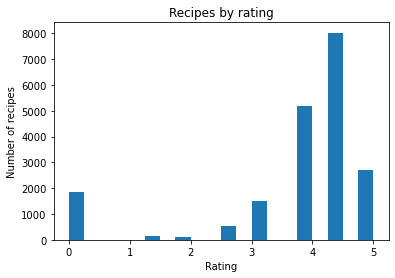

In [18]:
plt.hist(epicurious_data.rating, bins = 20)

plt.title("Recipes by rating")
plt.xlabel("Rating")
plt.ylabel("Number of recipes")
plt.show()

In [19]:
epicurious_data.rating.skew()

-1.8723731597384174

In [20]:
len(epicurious_data[epicurious_data.rating == 0])

1836

In [21]:
epicurious_data[epicurious_data.rating == 0]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
25,Garlic Baguette Crumbs,0.0,95.0,1.0,7.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Honey Rye,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Colin Perry’s Sorghum and Apple Sticky Pudding,0.0,523.0,8.0,19.0,694.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,Tomato-Infused Bulgur Pilaf with Fresh Basil,0.0,195.0,7.0,5.0,469.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000,Self-Starter,0.0,111.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20006,Fresh Tarragon Oil,0.0,379.0,1.0,41.0,231.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20008,Grill-Roasted Rack of Lamb in Red Mole,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20019,Spinach and Sorrel Spanakopita,0.0,228.0,5.0,18.0,474.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
epicurious_data[epicurious_data.rating == 5]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3,Mahi-Mahi in Tomato Olive Sauce,5.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.0,107.0,5.0,7.0,344.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,Moroccan-Style Preserved Lemons,5.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Fontina Mac with Squash and Sage,5.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20026,Spinach with Chickpeas and Fried Eggs,5.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20031,3-Ingredient Caramel-Pear Galette,5.0,234.0,2.0,7.0,213.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20033,Saffron Mayonnaise,5.0,201.0,0.0,22.0,167.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20036,Maple Old-Fashioned,5.0,161.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


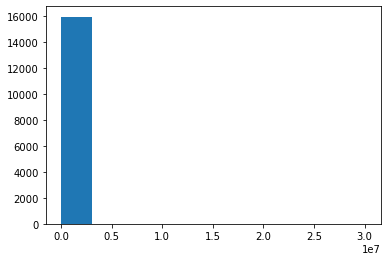

In [23]:
plt.hist(epicurious_data.calories)
plt.show()

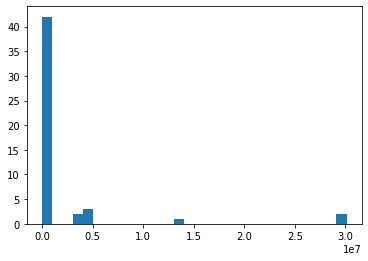

In [24]:
plt.hist(epicurious_data.nlargest(50, "calories").calories, bins = 30)
plt.show()

In [25]:
len(epicurious_data[epicurious_data.calories <= 2000])

15597

In [26]:
highly_caloric_foods = epicurious_data[(epicurious_data.calories > 2000) & (epicurious_data.calories <= 6000)]

In [27]:
len(highly_caloric_foods)

286

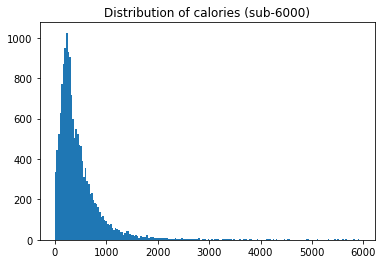

In [28]:
plt.hist(epicurious_data[epicurious_data.calories <= 6000].calories, bins = "fd")

plt.title("Distribution of calories (sub-6000)")
plt.show()

In [29]:
epicurious_data[epicurious_data.calories <= 6000].calories.skew()

4.236134582215162

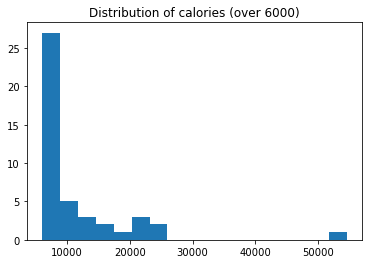

In [30]:
plt.hist(epicurious_data[(epicurious_data.calories > 6000) & (epicurious_data.calories < 1e6)].calories, bins = "fd")

plt.title("Distribution of calories (over 6000)")
plt.show()

In [31]:
highly_caloric_foods.sample(10)[["title", "calories"]]

,title,calories
18097,"Duck Stuffed with Chicken Liver, Candied Orang...",2230.0
5444,Olive-Oil-Poached Salmon and Braised Artichoke...,5656.0
10623,Eggplant Parmesan Heros,2154.0
5667,Roast Turkey with Port Wine Gravy,2043.0
16725,Goose and Tasso Gumbo,3656.0
1382,Roast Turkey with Hazelnut Stuffing,2352.0
9826,Chicken Parmesan Heros,3392.0
10987,"Rosemary, Lemon, and Garlic Leg of Lamb with R...",3613.0
17306,Coconut Cream Tart,4344.0
716,Roast Lobster with Pink Butter Sauce (Langoust...,4570.0


In [32]:
highly_caloric_desserts_percentage = highly_caloric_foods.groupby("dessert").size() / len(highly_caloric_foods)

In [33]:
highly_caloric_desserts_percentage

dessert
0.0    0.793706
1.0    0.206294
dtype: float64

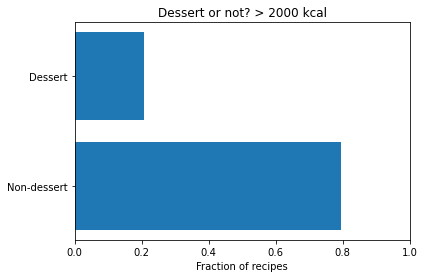

In [34]:
plt.barh(highly_caloric_desserts_percentage.index, highly_caloric_desserts_percentage)

plt.title("Dessert or not? > 2000 kcal")
plt.yticks([0, 1], ["Non-dessert", "Dessert"])
plt.xlabel("Fraction of recipes")
plt.xlim(0, 1)
plt.show()

In [35]:
less_caloric_foods = epicurious_data[(epicurious_data.calories <= 2000)]

In [36]:
less_caloric_desserts_percentage = less_caloric_foods.groupby("dessert").size() / len(less_caloric_foods)

In [37]:
less_caloric_desserts_percentage

dessert
0.0    0.815285
1.0    0.184715
dtype: float64

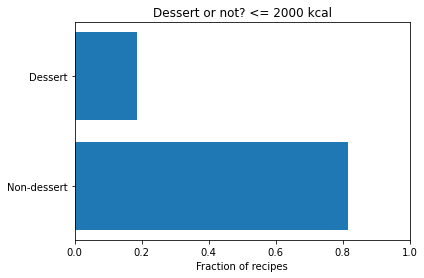

In [38]:
plt.barh(less_caloric_desserts_percentage.index, less_caloric_desserts_percentage)

plt.title("Dessert or not? <= 2000 kcal")
plt.yticks([0, 1], ["Non-dessert", "Dessert"])
plt.xlabel("Fraction of recipes")
plt.xlim(0, 1)
plt.show()

In [39]:
sub_6000_cal_foods = epicurious_data[epicurious_data.calories <= 6000]

In [40]:
len(sub_6000_cal_foods)

15883

In [41]:
median_calories = np.median(sub_6000_cal_foods.calories)
median_calories

330.0

In [42]:
low_calorie_foods = sub_6000_cal_foods[sub_6000_cal_foods.calories <= median_calories]
high_calorie_foods = sub_6000_cal_foods[sub_6000_cal_foods.calories > median_calories]

In [43]:
len(low_calorie_foods), len(high_calorie_foods)

(7955, 7928)

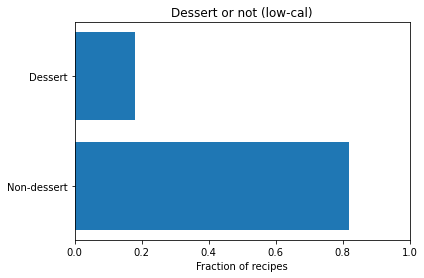

In [44]:
low_calorie_desserts_percentage = low_calorie_foods.groupby("dessert").size() / len(low_calorie_foods)
plt.barh(low_calorie_desserts_percentage.index, low_calorie_desserts_percentage)

plt.title("Dessert or not (low-cal)")
plt.yticks([0, 1], ["Non-dessert", "Dessert"])
plt.xlabel("Fraction of recipes")
plt.xlim(0, 1)
plt.show()

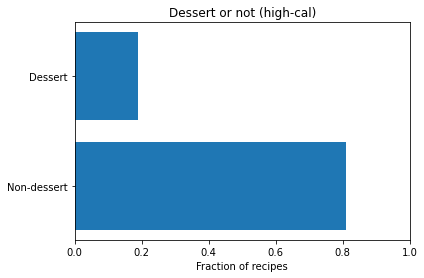

In [45]:
high_calorie_desserts_percentage = high_calorie_foods.groupby("dessert").size() / len(high_calorie_foods)
plt.barh(high_calorie_desserts_percentage.index, high_calorie_desserts_percentage)

plt.title("Dessert or not (high-cal)")
plt.yticks([0, 1], ["Non-dessert", "Dessert"])
plt.xlabel("Fraction of recipes")
plt.xlim(0, 1)
plt.show()

In [46]:
sub_6000_cal_foods.protein.min(), sub_6000_cal_foods.protein.max()

(0.0, 898.0)

In [47]:
sub_6000_cal_foods[sub_6000_cal_foods.protein == sub_6000_cal_foods.protein.min()]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
27,Dried Pear Crisps,2.500,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Italian Vinaigrette,3.750,185.0,0.0,20.0,155.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Parsley Mayo,0.000,306.0,0.0,34.0,302.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,Laddie's Sub-Bourbon,2.500,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,Honey Mustard Sauce,3.750,148.0,0.0,15.0,188.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,4-3-2-1 Spice Rub,4.375,16.0,0.0,0.0,2292.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20033,Saffron Mayonnaise,5.000,201.0,0.0,22.0,167.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20036,Maple Old-Fashioned,5.000,161.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20037,Russian,0.000,227.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


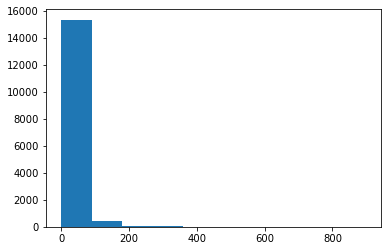

In [48]:
plt.hist(sub_6000_cal_foods.protein)
plt.show()

In [49]:
sub_6000_cal_foods.protein

0        30.0
1        18.0
2         6.0
4        20.0
5        19.0
         ... 
20047     2.0
20048    22.0
20049    31.0
20050    45.0
20051    73.0
Name: protein, Length: 15883, dtype: float64

In [50]:
sub_6000_cal_foods.protein = sub_6000_cal_foods.protein.fillna(0)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


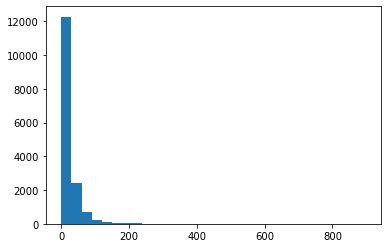

In [51]:
plt.hist(sub_6000_cal_foods.protein, bins = 30)
plt.show()

In [52]:
sub_6000_cal_foods.nlargest(10, "protein")

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
7471,Bass with Herbed Rice and Coconut-Vegetable Ch...,5.000,5474.0,898.0,150.0,4094.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17606,Veal with Eggplant and Prosciutto,4.375,4929.0,658.0,219.0,62368.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2187,Sea Scallops with Ham-Braised Cabbage and Kale,5.000,3801.0,626.0,42.0,20492.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2427,Sea Scallops with Ham-Braised Cabbage and Kale,5.000,3801.0,626.0,42.0,20492.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12267,"Grilled Shrimp, Corn and Black Bean Tostada Salad",4.375,3590.0,570.0,90.0,23361.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16055,"Osso Buco with Tomatoes, Olives, and Gremolata",5.000,3537.0,567.0,114.0,2953.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16427,Grilled Scallops with Tomato-Onion Relish,3.750,3338.0,493.0,77.0,16443.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10305,Mojito-Marinated Chicken Breasts,3.750,4084.0,474.0,213.0,2392.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5219,"Veal Shanks, Artichoke Hearts, and Chick-Peas ...",1.250,2685.0,440.0,82.0,2635.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3026,Osso Buco with Mushroom Sauce,4.375,2767.0,439.0,92.0,1931.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
sub_6000_cal_foods.fat.min(), sub_6000_cal_foods.fat.max()

(0.0, 599.0)

In [54]:
sub_6000_cal_foods[sub_6000_cal_foods.fat.isna()].title.tolist()

['Salted Water for Boiling',
 'Mint Julep',
 'Cashew Milk and Cashew Flour',
 'Piccadilly',
 'Manhattan II',
 'Sherry Vinegar Syrup',
 'Simple Japanese White Rice',
 'Negroni',
 'Bushranger',
 'Simple Syrup',
 'Bourbon Burnt Sugar Sauce',
 'Bunny Hug or Earthquake',
 'Simple Syrup',
 'Homemade Baking Powder',
 'Simple Syrup',
 'Homemade Red Wine Vinegar',
 "Queen's Peg",
 'Hot Gin Toddy',
 'Simple Syrup',
 'Bourbon Burnt Sugar Sauce',
 'Royal',
 'Simple Syrup',
 'Simple Syrup',
 'No-Cook Simple Syrup',
 'Basic Simple Syrup',
 'Simple Syrup',
 'Sweet Tea',
 'Sherry Vinegar Syrup',
 'Jasmine Tea Sorbet',
 'Hasty',
 'Peggy',
 'Liberty',
 'Salted Water for Boiling',
 'Simple Syrup',
 'Pink Gin',
 'Beer Americano',
 'Simple Syrup II',
 'Thistle',
 'Elegant',
 'Simple Syrup',
 'Salted Water for Boiling',
 'Perfect Bourbon Manhattans',
 'Fish Brine',
 'Adonis',
 'The Manhattan',
 'Manhattan',
 'Ulanda',
 'Sweet Tea',
 'Ladyfinger',
 'Simple Syrup',
 'Simple Syrup II',
 'Cashew Milk and Cashew

In [55]:
sub_6000_cal_foods.fat = sub_6000_cal_foods.fat.fillna(0)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


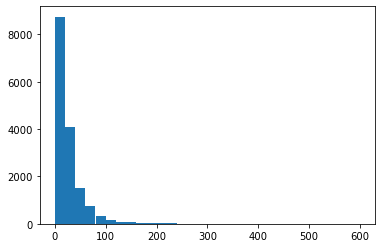

In [56]:
plt.hist(sub_6000_cal_foods.fat, bins = 30)
plt.show()

In [57]:
sub_6000_cal_foods.sodium.min(), sub_6000_cal_foods.sodium.max()

(0.0, 132220.0)

In [58]:
sub_6000_cal_foods[sub_6000_cal_foods.sodium.isna()]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
686,To Toast and Skin Hazelnuts,3.75,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17760,To Toast and Skin Hazelnuts,3.75,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
sub_6000_cal_foods.sodium = sub_6000_cal_foods.sodium.fillna(0)

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


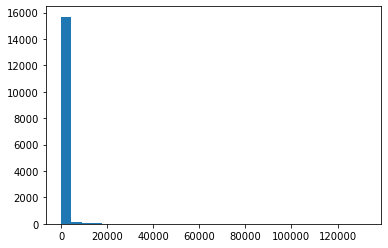

In [60]:
plt.hist(sub_6000_cal_foods.sodium, bins = 30)
plt.show()

In [61]:
sub_6000_cal_foods.nlargest(10, "sodium")

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3275,Whole Branzino Roasted in Salt,5.000,417.0,53.0,20.0,132220.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16190,Red Snapper Baked in Salt with Romesco Sauce,4.375,425.0,49.0,20.0,132025.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10625,Baked Oysters with Bacon,0.000,443.0,29.0,24.0,116178.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,Whole Fish Baked in Sea Salt,5.000,553.0,48.0,38.0,97225.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11697,Scallops with Mushrooms in White-Wine Sauce,4.375,190.0,9.0,13.0,90572.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11069,Grilled Salmon in Corn Husks,3.750,1210.0,43.0,99.0,67909.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,Chipotle Fried Onion Rings,3.750,714.0,45.0,37.0,67884.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16672,Salt-Baked Salmon with Citrus and Herbs,3.750,1234.0,131.0,74.0,67253.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13117,Herb-Brined Turkey with Pear Gravy,3.750,1291.0,163.0,60.0,66833.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17606,Veal with Eggplant and Prosciutto,4.375,4929.0,658.0,219.0,62368.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


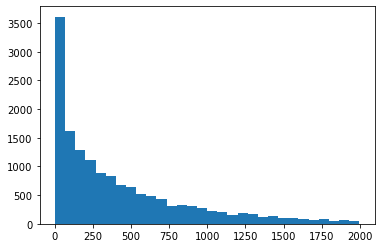

In [62]:
plt.hist(sub_6000_cal_foods.sodium[sub_6000_cal_foods.sodium < 2000], bins = 30)
plt.show()

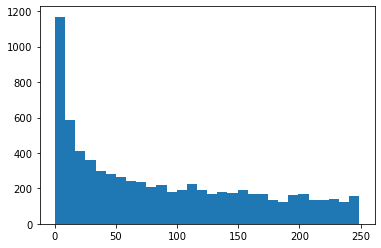

In [63]:
plt.hist(sub_6000_cal_foods.sodium[sub_6000_cal_foods.sodium < 250], bins = 30)
plt.show()

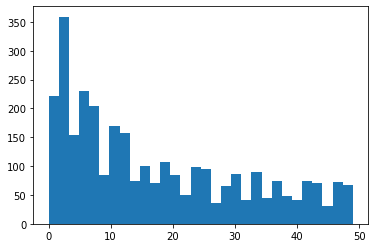

In [64]:
plt.hist(sub_6000_cal_foods.sodium[sub_6000_cal_foods.sodium < 50], bins = 30)
plt.show()

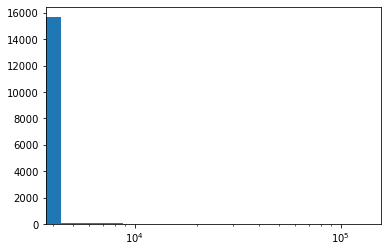

In [65]:
plt.hist(sub_6000_cal_foods.sodium, bins = 30)
plt.xscale("log")
plt.show()

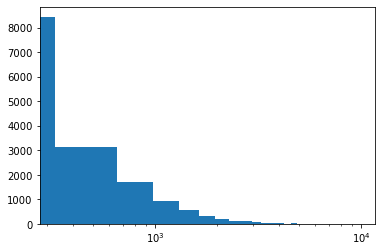

In [66]:
plt.hist(sub_6000_cal_foods.sodium[sub_6000_cal_foods.sodium < 1e4], bins = 30)
plt.xscale("log")
plt.show()

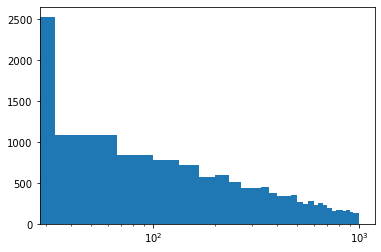

In [67]:
plt.hist(sub_6000_cal_foods.sodium[sub_6000_cal_foods.sodium < 1e3], bins = 30)
plt.xscale("log")
plt.show()

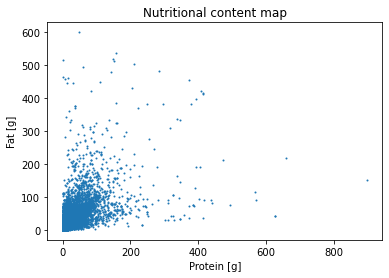

In [68]:
plt.scatter(sub_6000_cal_foods.protein, sub_6000_cal_foods.fat, s = 1)

plt.title("Nutritional content map")
plt.xlabel("Protein [g]")
plt.ylabel("Fat [g]")

plt.show()

In [69]:
sub_6000_cal_foods[["protein", "fat"]].corr()

,protein,fat
protein,1.00000,0.55401
fat,0.55401,1.00000


C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


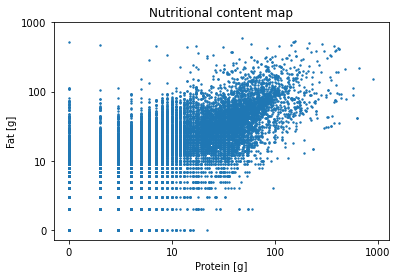

In [70]:
plt.scatter(np.log10(sub_6000_cal_foods.protein), np.log10(sub_6000_cal_foods.fat), s = 2)

plt.title("Nutritional content map")
plt.xticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.yticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.xlabel("Protein [g]")
plt.ylabel("Fat [g]")

plt.show()

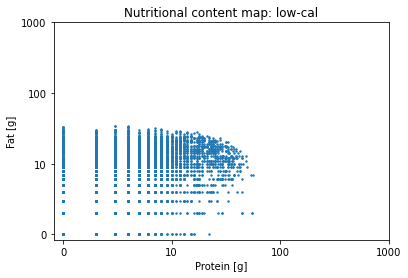

In [71]:
plt.scatter(np.log10(low_calorie_foods.protein), np.log10(low_calorie_foods.fat), s = 2)

plt.title("Nutritional content map: low-cal")
plt.xticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.yticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.xlabel("Protein [g]")
plt.ylabel("Fat [g]")

plt.show()

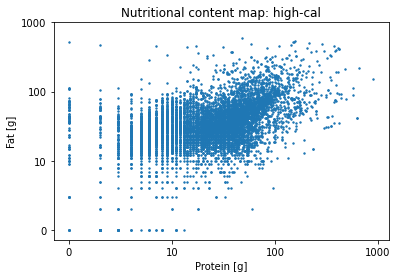

In [72]:
plt.scatter(np.log10(high_calorie_foods.protein), np.log10(high_calorie_foods.fat), s = 2)

plt.title("Nutritional content map: high-cal")
plt.xticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.yticks([0, 1, 2, 3], [0, 10, 100, 1000])
plt.xlabel("Protein [g]")
plt.ylabel("Fat [g]")

plt.show()

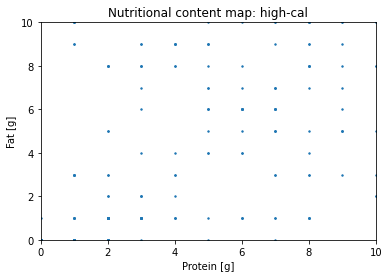

In [73]:
plt.scatter(high_calorie_foods.protein, high_calorie_foods.fat, s = 2)

plt.title("Nutritional content map: high-cal")
plt.xlabel("Protein [g]")
plt.ylabel("Fat [g]")

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()

In [74]:
high_cal_low_nutrients = high_calorie_foods[(high_calorie_foods.protein <= 10) & (high_calorie_foods.fat <= 10)]

In [75]:
high_cal_low_nutrients.groupby("drink").size()

drink
0.0    178
1.0     52
dtype: int64

In [76]:
high_cal_low_nutrients.groupby("dessert").size()

dessert
0.0    144
1.0     86
dtype: int64

In [77]:
high_cal_low_nutrients.groupby("salad").size()

salad
0.0    229
1.0      1
dtype: int64

In [78]:
high_cal_low_nutrients[high_cal_low_nutrients.salad == 1]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
12105,Fruit Salad with Ginger Syrup,4.375,542.0,4.0,1.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
sub_6000_cal_foods.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [80]:
[col for col in sub_6000_cal_foods.columns if "salad" in col]

['potato salad', 'salad', 'salad dressing']

In [81]:
[col for col in sub_6000_cal_foods.columns if "dessert" in col]

['dessert', 'frozen dessert']

In [82]:
[col for col in sub_6000_cal_foods.columns if "soup" in col]

['soup/stew']

In [83]:
[col for col in sub_6000_cal_foods.columns if "appetizer" in col]

['appetizer']

In [84]:
[col for col in sub_6000_cal_foods.columns if "drink" in col]

['drink', 'drinks', 'hot drink']

In [85]:
salads = sub_6000_cal_foods[(sub_6000_cal_foods["potato salad"] == 1) | (sub_6000_cal_foods["salad"] == 1)]
soups = sub_6000_cal_foods[sub_6000_cal_foods["soup/stew"] == 1]
appetizers = sub_6000_cal_foods[sub_6000_cal_foods["appetizer"] == 1]
desserts = sub_6000_cal_foods[(sub_6000_cal_foods["dessert"] == 1) | (sub_6000_cal_foods["frozen dessert"] == 1)]
drinks = sub_6000_cal_foods[(sub_6000_cal_foods["drink"] == 1) | (sub_6000_cal_foods["drinks"] == 1) | (sub_6000_cal_foods["hot drink"] == 1)]

salads 1165
soups 937
appetizers 1047
desserts 2968
drinks 823


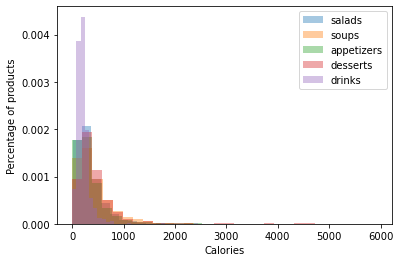

In [86]:
for group, group_name in zip([salads, soups, appetizers, desserts, drinks], ["salads", "soups", "appetizers", "desserts", "drinks"]):
    print(group_name, len(group))
    plt.hist(group.calories, label = group_name, bins = 30, density = True, alpha = 0.4)

plt.xlabel("Calories")
plt.ylabel("Percentage of products")    

plt.legend()
plt.show()

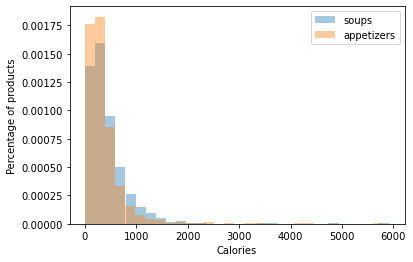

In [87]:
for group, group_name in zip([salads, soups, appetizers, desserts, drinks], ["salads", "soups", "appetizers", "desserts", "drinks"]):
    if group_name in ["soups", "appetizers"]:
        plt.hist(group.calories, label = group_name, bins = 30, density = True, alpha = 0.4)

plt.xlabel("Calories")
plt.ylabel("Percentage of products")    

plt.legend()
plt.show()

In [88]:
for group, group_name in zip([salads, soups, appetizers, desserts, drinks], ["salads", "soups", "appetizers", "desserts", "drinks"]):
    print(group_name, "{:.3f}".format(len(group[group.calories <= median_calories]) / len(group)))

salads 0.615
soups 0.495
appetizers 0.614
desserts 0.491
drinks 0.899


In [89]:
all_titles = " ".join(sub_6000_cal_foods.title.tolist())

In [90]:
all_words = re.split("\W+", all_titles)
all_words = [word for word in all_words if word != ""]
cleaned_words = [word for word in all_words if word not in set(stopwords.words("english"))]

In [91]:
all_words_in_titles_counter = Counter(cleaned_words)

In [92]:
dict(all_words_in_titles_counter.most_common(20))

{'Sauce': 1415,
 'Salad': 1173,
 'Chicken': 956,
 'Cream': 810,
 'Cheese': 728,
 'Roasted': 630,
 'Lemon': 625,
 'Chocolate': 562,
 'Red': 559,
 'Tomato': 557,
 'Grilled': 536,
 'Soup': 482,
 'Potato': 441,
 'Garlic': 438,
 'Orange': 435,
 'Pork': 406,
 'Cake': 387,
 'Ginger': 387,
 'Green': 366,
 'Butter': 358}

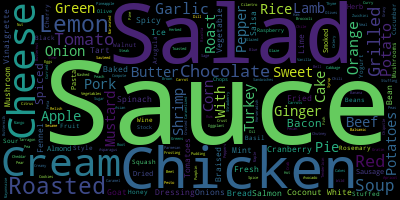

In [93]:
cloud = wordcloud.WordCloud()
cloud.generate_from_frequencies(dict(all_words_in_titles_counter))
cloud.to_image()

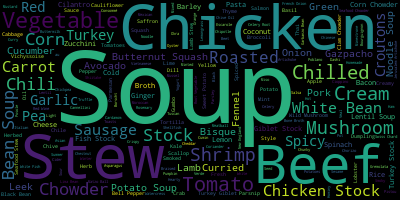

In [94]:
soup_titles = " ".join(soups.title.tolist())
cloud = wordcloud.WordCloud()
cloud.generate_from_text(soup_titles)
cloud.to_image()

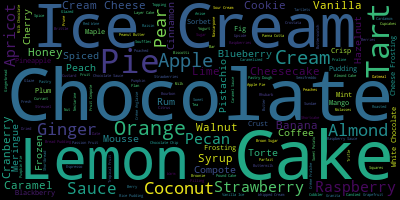

In [95]:
dessert_titles = " ".join(desserts.title.tolist())
cloud = wordcloud.WordCloud()
cloud.generate_from_text(dessert_titles)
cloud.to_image()

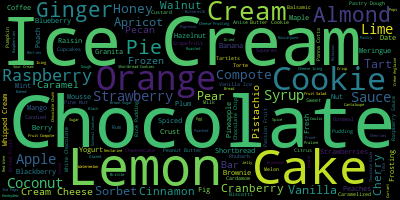

In [96]:
low_cal_dessert_titles = " ".join(desserts[desserts.calories <= median_calories].title.tolist())
cloud = wordcloud.WordCloud()
cloud.generate_from_text(low_cal_dessert_titles)
cloud.to_image()

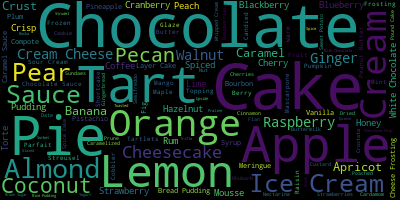

In [97]:
high_cal_dessert_titles = " ".join(desserts[desserts.calories > median_calories].title.tolist())
cloud = wordcloud.WordCloud()
cloud.generate_from_text(high_cal_dessert_titles)
cloud.to_image()

In [98]:
apple_pie_dir = "data/food-101-tiny/train/apple_pie/"
sushi_dir = "data/food-101-tiny/train/sushi/"

In [99]:
apple_pie_paths = [os.path.join(apple_pie_dir, file) for file in os.listdir(apple_pie_dir)][:20]
sushi_paths = [os.path.join(sushi_dir, file) for file in os.listdir(sushi_dir)][:20]

In [100]:
apple_pies = list(map(lambda path: imread(path), apple_pie_paths))
sushi = list(map(lambda path: imread(path), sushi_paths))

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 196608 bytes but only got 0. Skipping tag 0
  "Possibly corrupt EXIF data.  "
C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


In [101]:
apple_pies = [resize(img, IMG_SIZE, preserve_range = True).astype(np.uint8) for img in apple_pies]
sushi = [resize(img, IMG_SIZE, preserve_range = True).astype(np.uint8) for img in sushi]

In [102]:
apple_pies_data = []
for img in apple_pies:
    apple_pies_data.append(img.ravel())

In [103]:
sushi_data = []
for img in sushi:
    sushi_data.append(img.ravel())

In [104]:
apple_pies_data = pd.DataFrame(apple_pies_data)
apple_pies_data["type"] = "apple_pie"

In [105]:
sushi_data = pd.DataFrame(sushi_data)
sushi_data["type"] = "sushi"

In [106]:
images_data = pd.concat([apple_pies_data, sushi_data]).reset_index(drop = True)

In [107]:
images_data = images_data.sample(len(images_data))

In [108]:
images_target = images_data["type"]
images_data = images_data.drop("type", axis = 1)

In [109]:
images_data = MinMaxScaler().fit_transform(images_data)

In [110]:
linda = LinearDiscriminantAnalysis()

In [111]:
linda.fit(images_data, images_target)

LinearDiscriminantAnalysis()

In [112]:
list(zip(linda.transform(images_data).flatten(), images_target))

[(0.24203595179724885, 'apple_pie'),
 (-1.4449118567220287, 'apple_pie'),
 (-1.014618785520517, 'apple_pie'),
 (0.7482707022622723, 'sushi'),
 (1.4437604520299265, 'sushi'),
 (-0.6013498161781957, 'apple_pie'),
 (-1.0524440198134495, 'apple_pie'),
 (1.5432438721899742, 'sushi'),
 (0.6628754175055299, 'sushi'),
 (0.8309658696945953, 'sushi'),
 (-1.3685261814990082, 'apple_pie'),
 (1.4684114455220074, 'sushi'),
 (1.3977961069056384, 'sushi'),
 (0.2998473528752025, 'sushi'),
 (1.5517842165912814, 'sushi'),
 (-1.695462174506051, 'apple_pie'),
 (0.5537812739185591, 'sushi'),
 (-1.5777272973627254, 'apple_pie'),
 (-2.1033874776011965, 'apple_pie'),
 (0.25972184905551143, 'sushi'),
 (-0.8658273014343061, 'apple_pie'),
 (-1.4937588756257791, 'apple_pie'),
 (0.5620177600552031, 'sushi'),
 (-1.48126665349474, 'apple_pie'),
 (3.7757089462355875, 'apple_pie'),
 (0.694442973347711, 'sushi'),
 (0.6344481886867407, 'sushi'),
 (1.0181369236169564, 'sushi'),
 (-1.6118212571706894, 'apple_pie'),
 (-1.08

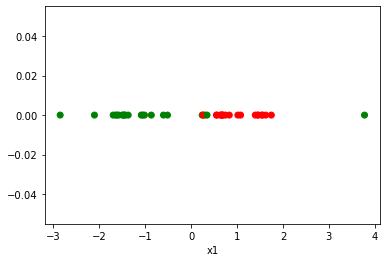

In [113]:
plt.scatter(linda.transform(images_data), [0] * len(images_data), c = images_target.map({"sushi": "r", "apple_pie": "g"}))

plt.xlabel("x1")
plt.show()

In [114]:
linda.score(images_data, images_target)

0.925